In [1]:
import numpy as np
from math import  ceil, floor
import pandas as pd
import polars as pl
from polars import col
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import statsmodels.api as sm

In [6]:
import numpy as np
a = np.arange(9) - 4

( (a**2)
 .sum()
 ** 0.5 )

7.745966692414834

#                               How stats.normal or uniform works
```js
        'Warning' : You may not understood what''s written here but you will need it later.

        from scipy importt stats : This 'stats' has e.g. "norm" to create a Normal_Distribution_object and inside a Normal_Distribution_object there are methods like pdf(), cdf(), ppf() etc to calculate that Normal_Distribution''s pdf(), cdf(), ppf() etc.

        But how does it work? See the next codeblock.
```

mean = 0.020507216931357063 std = 1.0015117370440625 
mean = 0.020507216931357063 std = 1.0015117370440625


<Axes: >

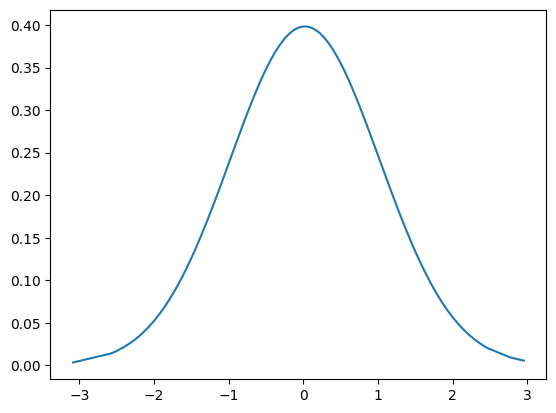

In [ ]:
normal_distr = np.random.normal(loc=0, scale=1, size=(1000,)) # inside normal(..) we pass the POPULATION'S mean(loc) and
# std(scale) and normal() returns SAMPLE of 1000 values. mean and std of SAMPLE is veryyyyy close to the mean and std of
# POPULATION e.g. sample i.e. normal_distr's mean = 0.02 which is veryyy close to POPULATION's mean(0) but not 0.

# 1) One way to create Normal Distribution object.
norm_obj = stats.norm(loc=normal_distr.mean(), scale=normal_distr.std()) # creating a Normal Distribution object with A
# NORMAL_DISTRIBUTION_DATA(normal_distr)'s mean and std. Using this Normal dist.. object we can find the pdf of normal_distr
# itself OR any SAMPLE's which is CONTINUOUS version of 'normal_distr' e.g. np.linspace(normal_distr[0], normal_distr[-1], 100)
# and these 100 values are BETWEEN normal_distr[0] and normal_distr[-1] which is okay because they are part of normal_distr and
# we can find any RANDOM value's pdf which is BETWEEN normal_distr[0] and normal_distr[-1], using normal_distr.pdf(random_value).
# Note : normal_distr.mean() is not 0 but close to 0 which we don't know what. That's why wrote loc = normal_distr.mean().
#        Similarly normal_distr.std() is not 1 but close to 1 which we don't know what. So wrote std = normal_distr.std().

# 2) Another way to create Normal Distribution object.
norm_fit = stats.norm.fit(data=normal_distr) # fit() returns the normal_distr.mean() and normal_distr.std() as tuple(mean, std).
norm_obj = stats.norm(loc=norm_fit[0], scale=norm_fit[1]) # norm_fit[0] = mean, norm_fit[1] = std.

# Proof that normal_distr.mean() == norm_fit[0]      and      normal_distr.std() == norm_fit[1].
print('mean =', norm_fit[0],         'std =', norm_fit[1],
    '\nmean =', normal_distr.mean(), 'std =', normal_distr.std())

# plotted the kdeplot() keeping normal_distr on X Axis and it's PDF on Y Axis.
sns.lineplot(x = normal_distr, y = norm_obj.pdf(normal_distr))

# Similarly the other distribution from stats e.g. uniform works the same way but in uniform(low, high) we have low and high,
# which means uniform.fit(uniform_data) returns loc(low) and scale(high) which is very close to POPULATION's low and high.

#                                               PMF
```js
        PMF = Probability Mass Function, used for 'DISCRETE RANDOM VARIABLES'.
              y = f(x), where y is the result(probability of x) and x is any random discrete value.

        SO in PMF we find the probability of a single discrete value and same for others.
```

shape: (6, 3)
┌──────┬───────┬─────────────┐
│ roll ┆ count ┆ probability │
│ ---  ┆ ---   ┆ ---         │
│ i32  ┆ u32   ┆ f64         │
╞══════╪═══════╪═════════════╡
│ 1    ┆ 1657  ┆ 0.1657      │
│ 2    ┆ 1618  ┆ 0.1618      │
│ 3    ┆ 1680  ┆ 0.168       │
│ 4    ┆ 1646  ┆ 0.1646      │
│ 5    ┆ 1704  ┆ 0.1704      │
│ 6    ┆ 1695  ┆ 0.1695      │
└──────┴───────┴─────────────┘


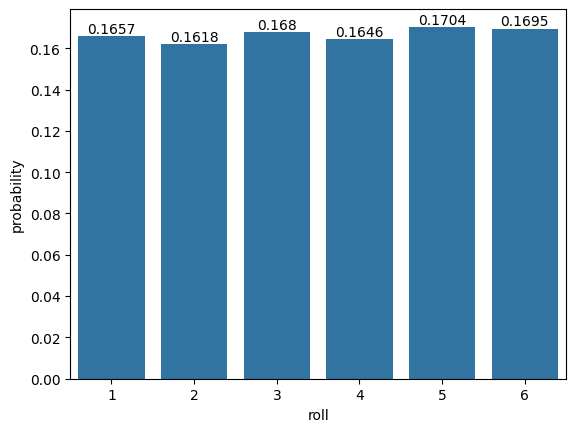

In [2]:
"""
Q : list = [1, 5, 2, 3, 2, 6, 2]. What is the probability for each roll of dice?
---
Ans :
-----
    number of rolls occurred in list = 7

    So, P(1) = count_of(1) / 7 = 1 / 7
        P(2) = count_of(2) / 7 = 3 / 7
        P(3) = count_of(3) / 7 = 1 / 7
        P(4) = count_of(4) / 7 = 0 / 7
        P(5) = count_of(5) / 7 = 1 / 7
        P(6) = count_of(6) / 7 = 1 / 7
    
    1/7 + 3/7 + 1/7 + 0/7 + 1/7 + 1/7 = 1

    Now below we will roll THE dice RANDOMLY for 10_000 times and after finding their probability, we plot.
"""
# 1) Computing the rolls of dices 10_000 times. Then count of each unique roll and their probability.
rolls_of_dices = np.random.randint(low=1, high=7, size=(10_000,)) # high = exclusive
rolls_of_dices = pl.Series(name='roll', values=rolls_of_dices)

count_of_each_unique_roll = ( rolls_of_dices.value_counts()
                             .sort(by='roll')
                             .with_columns(probability = col('count') / rolls_of_dices.len()) # here probability = PMF
                            )
print(count_of_each_unique_roll)

# 2) Bar-plotting the probability(PMF) of each unique roll.
axes = sns.barplot(data=count_of_each_unique_roll, x='roll', y='probability')
axes.bar_label(container=axes.containers[0])
plt.show()

#                                                       PMF to CDF
```js
        What PMF does? It finds the Probability for each particular DISCREATE VALUE. e.g. :
                                        ┌──────┬──────────────────┐
                                        │ roll ┆ PMF(probability) │
                                        │ ---  ┆ ---------------- │
                                        │ i32  ┆ f64              │
                                        ╞══════╪══════════════════╡
                                        │ 1    ┆ 0.1693           │
                                        │ 2    ┆ 0.1627           │
                                        │ 3    ┆ 0.1699           │
                                        │ 4    ┆ 0.1657           │
                                        │ 5    ┆ 0.1718           │
                                        │ 6    ┆ 0.1606           │
                                        └──────┴──────────────────┘
        
        PMF => P(x=3)  = 0.1699                   -- Probability only for the value 3.
        CDF => P(x<=3) = P(x=3) + P(x=2) + P(x=1) -- Probability for all the values which are LESS THAN and EQUAL TO 3.
                       = 0.1699 + 0.1627 + 0.1693
                       = 0.5019

        So CDF(Cumulative Distribution Function) gives us the Probability from 1_to_x / upto_x / 'cumulative_sum_upto_x'.
        ----------------------------------------------------------------------------------------------------------------------------

        The last CDF value is ALWAYS 1 e.g. CDF for P(x<=6) = 1 where 6 is the LAST VALUE OF A DICE, we can''t have 7 of a Dice.
        Q   : Why the Last CDF value is 1?
        Ans :
        -----
              Imagine a bus has 100 seats. Now
              when the 1ST PASSENGER seats on his seat, he occupies 1/100 = 0.01 space,
              when the 2ND PASSENGER seats on his seat, he and 1ST PASSENGER occupies 2/100 = 0.02 space,
              when the 3RD PASSENGER seats on his seat, he and the other 2 PASSENGERS occupies 3/100 = 0.03 space,
              ..............................
              when the 80TH PASSENGER seats on his seat, he and the other 79 PASSENGERS occupies 80/100 = 0.8 space,
              ..............................
              when the 100TH PASSENGER seats on his seat, he and the other 99 PASSENGERS occupies 100/100 = 1 space.

              Here the values started from close_to_0(0.01) to 1 (NORMALIZED_VALUES / Probability_starts_from_0_to_1).
              So the moment the LAST VALUE/PASSENGER sat, the CDF value became 1 because :
                  x<=100 covers EVERYTHING(the below 99 passengerS and 100th itself),
                  P(x<=100) covers EVERYTHING(the below 99 passenger''s probabilities and 100th itself).
              Similarly for DICE :
                  x<=6    covers EVERYTHING(the below 5 roll and 6th roll itself),
                  P(x<=6) covers EVERYTHING(the below 5 roll''s probabilities and 6th roll itself).

              Even if the bus had 133 seats, right after 133th Passenger seats, the occupied space is 133/133 = 1 and "1 MEANS COVERED_UP_EVERYTHING". 
```

shape: (6, 4)
┌──────┬───────┬────────┬────────┐
│ roll ┆ count ┆ PMF    ┆ CDF    │
│ ---  ┆ ---   ┆ ---    ┆ ---    │
│ i32  ┆ u32   ┆ f64    ┆ f64    │
╞══════╪═══════╪════════╪════════╡
│ 1    ┆ 1657  ┆ 0.1657 ┆ 0.1657 │
│ 2    ┆ 1706  ┆ 0.1706 ┆ 0.3363 │
│ 3    ┆ 1674  ┆ 0.1674 ┆ 0.5037 │
│ 4    ┆ 1642  ┆ 0.1642 ┆ 0.6679 │
│ 5    ┆ 1625  ┆ 0.1625 ┆ 0.8304 │
│ 6    ┆ 1696  ┆ 0.1696 ┆ 1.0    │
└──────┴───────┴────────┴────────┘


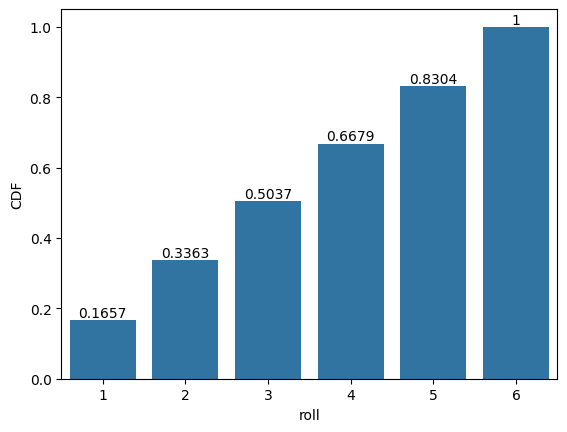

In [ ]:
# 1) Computing the rolls of dices 10_000 times. Then count of each unique roll, their PMF and CDF from PMF
rolls_of_dices = np.random.randint(low=1, high=7, size=(10_000,)) # high = exclusive
rolls_of_dices = pl.Series(name='roll', values=rolls_of_dices)

count_of_each_unique_roll = ( rolls_of_dices.value_counts()
                             .sort(by='roll')
                             .with_columns(PMF = col('count') / rolls_of_dices.len())
                             .with_columns(CDF = col('PMF').cum_sum())
                            )
print(count_of_each_unique_roll)

# 2) Bar-plotting the probability(CDF) of each unique roll.
axes = sns.barplot(data=count_of_each_unique_roll, x='roll', y='CDF')
axes.bar_label(container=axes.containers[0])
plt.show()

#                                                   1. Normal Distribution

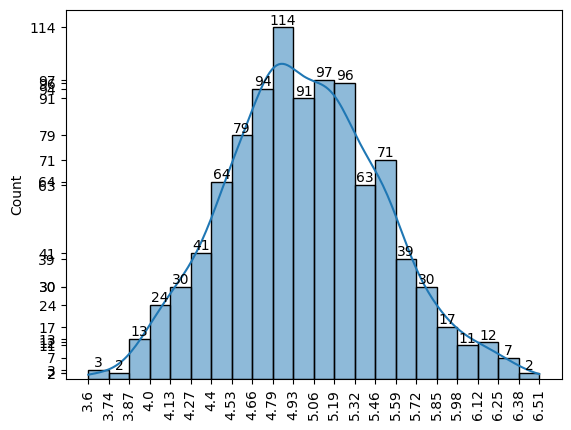

In [ ]:
sample = np.random.normal(loc=5, scale=0.5, size=(1000,))
ax = sns.histplot(x=sample, kde=True) # What Normal Distribution looks like as both histplot() and kdeplot().

bins_edges = np.array([patch.get_x() for patch in ax.patches] +
                      [ax.patches[-1].get_x() + ax.patches[-1].get_width()])

ax.set_xticks(ticks=bins_edges, labels=bins_edges.round(2), rotation=90)
ax.set_yticks(ticks=ax.containers[0].datavalues)
ax.bar_label(container=ax.containers[0])

plt.show()

traits_of_Normal_Distribution = """
    1) The LAST EDGE PARTS (bar values = 3, 2 and 7, 2) are called "Tail".
    2) The Middle Part where "Mean"(114) lies and around_the_mean(from left 64 to right 71) MOST VALUES/POINTS exists.
    3) And around the Tails, the less values/points exists.
    4) The TAILs never touch the X Axis directly because they ends at INFINITY. Sometimes it may look like the tails are touching
       the X Axis but actually not.
    5) A Normal Distribution is characterized by only 2 parameters, MEAN and STD(standard deviation). If you know the data
       follows Normal Distribution and you have the Mean and STD, then you can plot the graph using the Mean and STD.

    6) If the data follows Normal Distribution 100%, then both side of the Middle Line of a Normal Distribution are symmatrical and
       follow the Empirical rule(see 'Empirical.png') where 68.27% values lies BETWEEN 1 STD values, 95.47% values lies BETWEEN
       2 STD values and lastly 99.73% values i.e. almost all the values lies BETWEEN 3 STD values.
   
    7) If the data follows Normal Distribution 100% then MEAN = MEDIAN = MODE here.

    8) If the MEAN is positive(mean>0), then the Middle Line(which represents Mean) will be on Positive side of the X Axis. But
       the LEFT SIDE of the Middle Line might be on the Negative side or not.
       So if MEAN is positive, then the ND Graph will be on the Positive Side of X Axis. If MEAN its negative, it will be on the
       Negative Side of Axis. But if its 0, it will be on 0 of the X Axis.

    9) The less the value of STD is, the less the SPREAD of the values from the MEAN will be and the graph will look like 
       "SKINNY and TALL" (See "std.png" to see why. Imagine 'Jar A' as the Default STD and you are decreasing STD i.e. compressing
       the Jar A). And the more the STD is, the more "Fat and Short" the graph will be (because imagine to compress the 'Jar B'
       from both TOP and BOTTOM side. It will be Short and Fat to accomodate all those 100 Iron Balls, right?).

       Q   : But why only Mean and STD enough? What about the datas? Don't we need them to plot the whole graph?
       Ans : If my data follows Normal Distribution, that means it follows ALL THE RULES OF NORMAL DISTRIBUTION e.g. how many
             values must be around the MEAN and how all the values deviates from the MEAN i.e. STD etc, so I don't need the
             data anymore to plot the Normal Distribution, all I need to know Does the data follow normal distribution and if
             it does, then what is the MEAN and the STD. See? Not so complicated like Arrange Marriage!

        Create Normal Distribution using only MEAN & STD => https://samp-suman-normal-dist-visualize-app-lkntug.streamlit.app/ .
"""

#                               ____ Normal Distribution Formula Derivation
```js
        To understand the Derivation of Normal Distribution''s Formula, see "Normal_Distribution_formula_derivation.pdf" folder under this 'math for DS' folder.
```

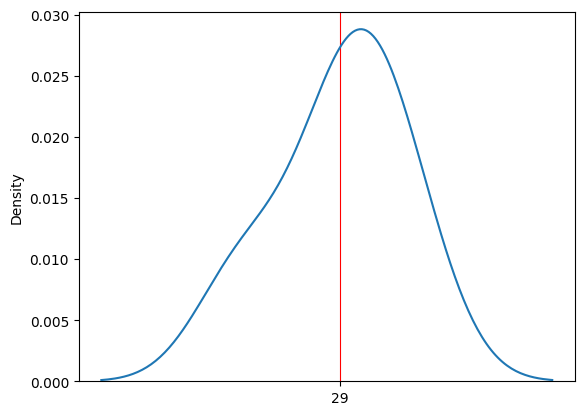

In [50]:
age = np.array([25, 34, 10, 43, 33])
# age.mean() = 29
# age.std()  = 11.08

ax1 = sns.kdeplot(x=age)
ax1.set_xticks(ticks=[ age.mean() ])
plt.grid(color='red', axis='x')

#                                               ____ Standard Normal Distribution
```js
        A Standard Normal Distribution(also called Z-Distribution) is a standardized form of the Normal Distribution with mean 
= 0 and standard deviation = 1.

        Purpose
        -------
            It converts any Normal Distribution (doesn''t matter what their distribution, mean, std is) into A Special Normal Distribution where the MEAN = 0 and STD = 1.
            Now to find the area under any range of the Bell Curve(The curve of Normal Distribution) is easy. Wait! If we can convert any Normal Distribution having any Mean and STD 'into Z Distribution whose MEAN = 0 and STD = 0 ALWAYS', then we don''t need to compute ANY SPECIFIC AREA UNDER THE CURVE frequently, RATHER THERE SHOULD BE A CHART FROM WHERE we can find the output we want and this is already available as 'Z Table'(https://www.ztable.net/).
            
        Process to convert any NORMAL DISTRIBUTION into STANDARD NORMAL DISTRIBUTION
        ----------------------------------------------------------------------------
        Assume, age = np.array([1,2,3, 4, 5,6,7]) and its mean = 4, std = 2.

        Convert EACH VALUE to STANDARD_NORMAL_VERSION('Z').

        1) "Shift Each Value towards mean = 0" :
        ----------------------------------------
           Given mean = 4. But we want the new_mean to be 0. We can convert 4 into 0 by subtracting itself i.e. 4 - 4.
           Since mean is just Another Value on X Axis, so we are basically moving x=4 to x=0 by "x - mean"(4 - 4).

           So the new value for x = 4 is 4 - 4 = 0, similarly
                            for x = 5 is 5 - 4 = 1,
                            for x = 2 is 2 - 4 = -2.
        
        2) "Scale Each New Value obtained by (x - mean) to have TOTAL STD for 'age' = 1" :
        ------------------------------------------------------------------------
            Divide the STD from each new value i.e.
                                                        x - MEAN
                                                        ────────
                                                           STD
            
            Q : Why DIVISION BY STD is needed here for making STD = 1?
            Answer :
            --------
                age  = [1,     2,    3, 4,   5, 6,   7] // age.mean() = 4, age.std() = 2
                age1 = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5] // age.mean() = 0, age.std() = 2 [After doing (age - age.mean())]
                
                Just because the values are more lesser in age1, doesn''t mean the std will be lesser or 1. STD = 2 means each value of age1 is deviated 2 units away from the age1.mean(). But we want each value to be 1 unit away from the mean, so that STD becomes 1 :
                        1)  for x = 0.5 : 2 units away the value 0.5
                                      so, 1 unit   ||   ||   ||  0.5 / 2 = 0.25

                            Similarly for other values in age1, we have to divide them by std(2) to make sure all the value''s STD = 1.
                        
                        2) Or you can think like this way : The value 0.5 is deviated from the mean such a away that it''s std = 2. So, 'x * 2 = 0.5' i.e. 0.5 IS BUILT INCORPORATING STD=2 INSIDE IT and WE NEED TO GET 'x' out of it which is 1 unit away. So, we need to remove 2(STD) from 'x * 2' by dividing 2(STD).

                                                            x * 2
                                                            -----  = x * 1
                                                              2
                        
                Thats why dividing by STD is necessery to make sure STD = 1 because 'age - age.mean()' won''t make the std = 1.
        
        MUST => See the below codeblock''s "OUTPUT and EXPLANATION", then input. Then the next 2nd codeblock.
```

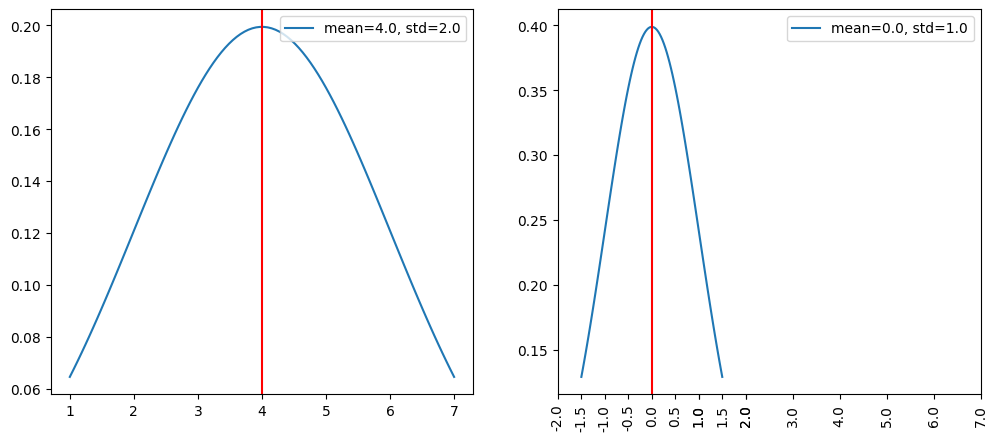

In [ ]:
#                                       Before Standard Normalization

age = np.arange(1, 8) # 1 2 3   4    5 6 7            mean = 4, std = 2     (Note : age is Normal Distribution values).
sample = np.linspace(age[0], age[-1], 100, True) # "age" has discrete values which won't return smooth Normal Distribution Graph,
# we need values between e.g. 1 and 2 also to have a SMOOTH GRAPH. So I created sample CONTINUOUS VALUES between age[0] and age[-1].
normal = stats.norm(loc=age.mean(), scale=age.std()) # creating a Normal Dist.. object with A NORMAL_DISTRIBUTION_DATA(age)'s mean
# and std. Using this Normal dist.. object we can find the pdf of age itself OR the sample's which is CONTINUOUS version of 'age'.
pdf = [normal.pdf(v) for v in sample] # since age's small number of values can't create SMOOTH graph, so 'sample' used.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = sns.lineplot(x=sample, y=pdf, ax=axes[0])
ax1.axvline(x=age.mean(), color='red')
ax1.set_xticks(ticks=age)
ax1.legend(labels = [f"mean={round(age.mean(), 2)}, std={round(age.std(), 2)}"], loc='upper right')

#                                       After  Standard Normalization
age1 = (age - age.mean()) / age.std()
sample1 = np.linspace(age1[0], age1[-1], 100, True)
normal1 = stats.norm(age1.mean(), age1.std())
pdf1 = [normal1.pdf(v) for v in sample1]

ax2 = sns.lineplot(x=sample1, y=pdf1, ax=axes[1])
xticks = np.hstack([ ax1.get_xticks(), ax2.get_xticks() ])
ax2.axvline(x=age1.mean(), color='red')
ax2.set_xticks(ticks=xticks, labels=xticks.round(2), rotation=90)
ax2.legend(labels = [f"mean={round(age1.mean(), 2)}, std={round(age1.std(), 2)}"], loc='upper right')

plt.show()
explanation = """
    Right Graph :
    ─────────────
    MEAN = 0 and since STD = 1 which is less than Original Data's(Left Graph) STD, so the values on X axis are CLUSTERED
    closer to the MEAN and also the Y Axis values(Probability Density) are higher than the left graph's
    
        So that means from STD = (SHORT, FAT) we have (TALL, SKINNY) because STD decreased from 2 to 1.
"""

In [ ]:
#                           Calculating Area until X Point from the above SECOND GRAPH
z_score = """
    Given, age = [1, 2, 3, 4, 5, 6, 7].
    Q   : What will be the PROBABILITY for a randomly selected human that he/she has age more than 4.5?
    Ans : 
                4.5 - age.mean()     4.5 - 4
            z = ────────────────  = ───────── = 0.25, so we need to calculate the area from 0.26 to 1.5 by 
                    age.std()           2             (1 - Area_from_-1.5_to_0.25)
            
            Since z is positive, look 0.2(the first 2 values) on the COLUMN and 0.05(the second decimal point) on the
            ROW in 'Positive_Z_Score_Table.png' = 0.58871 which is the probability for 

            Since we need higher, not Lower Or Equal than 0.58871, so 1 - 0.58871 = 0.4112 i.e. the PROBABILITY for a
            randomly selected human that he/she has age more than 4.5 is 0.4112. In percentage its 41.12% 
"""

#                                                   ____ Use of Normal Distribution
```js
        - Outlier detection.
        - Assumptions on data that need to follow Normal Distribution for ML algorithms -> Linear Regression and GMM.
        - Hypothesis Testing.
        - Central Limit Theorem.

        Outliers detection :
        --------------------
            As we have seen in "Empirical.png" that 99.73% values covered within Negative_3_STD and Positive_3_STD values. It means values OUTSIDE [ from μ-3σ to μ+3σ ] are OUTLIERS.
```

In [13]:
titanic = pl.read_csv(r"d:\Datasets\CampusX\titanic.csv")
mean_age,  std_age = titanic['Age'].mean(), titanic['Age'].std()
start_age, end_age = mean_age - 3*std_age, mean_age + 3*std_age

titanic.filter((col('Age') < start_age) | (col('Age') > end_age)) # extracting the OUTLIER's information.

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
631,1,1,"""Barkworth, Mr. Algernon Henry …","""male""",80.0,0,0,"""27042""",30.0,"""A23""","""S"""
852,0,3,"""Svensson, Mr. Johan""","""male""",74.0,0,0,"""347060""",7.775,null,"""S"""


#                                                            ____ PDF
```js
        PDF = Probability Density Function, used for "CONTINUOUS RANDOM VARIABLES".
```

#                                                ________ Parametric Density Estimation
```js
        Here at first we need to assume what our distribution looks like such as the Normal, Exponential, or Poisson distributions.
        If we have dataset available, then we can histplot() to see how it may looks like.

        Assuming the distribution looks like normal_distribution(), so lets first generate 1000 Normal Distribution values by providing POPULATION MEAN(loc) and STD(scale). But since we are generating a portion i.e. 1000 values, so the returned 1000 values will be 'sample' whose MEAN and STD is CLOSE TO POPULATION''S MEAN and STD.

        (The main purpose here is to calculate the pdf manually instead of using directly sns.kdeplot())
```

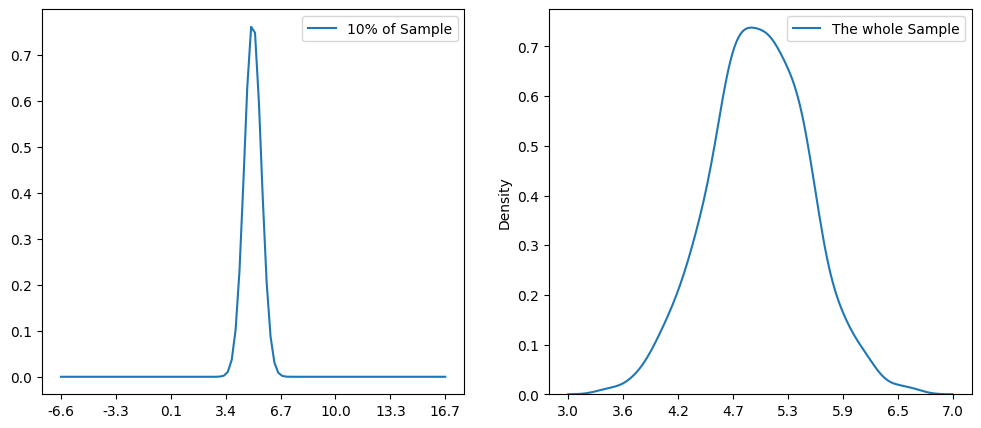

In [ ]:
# Read the upper block first.
sample      = np.random.normal(loc=5, scale=0.5, size=(1000,))
normal_dist = stats.norm(loc=sample.mean(), scale=sample.std()) # returns a Normal_Distribution object for the sample's mean & std.
#           = Why not norm(values.mean(), values.std())? Because to create a norm(..) object we need NORMALLY DISTRIBUTED value's
#             mean() and std(). "values" is not so different since it is between sample.min() and sample.max().

# values      = 100 Evenly Spaced values from sample.min() to sample.max() whose PROBABILITIES ( normal_dist.pdf(random_value) )
#               give more SMOOTH CURVY LINE on the Y Axis than 'sample' can since 'sample' is NORMALLY DISTRIBUTED, not EVENLY.
values        = np.linspace(start=sample.min(),stop=sample.max(), endpoint=True, num=100)
probabilities = [normal_dist.pdf(random_value) for random_value in values]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = sns.lineplot(x=values, y=probabilities, label='10% of Sample', ax=axes[0])
line1 = ax1.lines[0] # ax1.lines.__len__() = 1, the only line(line_object) drawn in that lineplot().
x_ticks1 = np.linspace(start=line1.get_xdata()[0], stop=line1.get_xdata()[-1], num=8, endpoint=True)
ax1.set_xticks(ticks=x_ticks1, labels=x_ticks1.round(1))

ax2 = sns.kdeplot(x=sample, label='The whole Sample', ax=axes[1])
# Why x=sample, not x=values? Because "sample" is NORMAL DISTRIBUTION VALUES where "values" are EVENLY SPACED VALUES.
# And since we want to plot KDE on NORMAL DISTRIBUTED VALUES to get a NORMAL DISTRIBUTION GRAPH, that's why x=sample.
# Our Graph/kdeplot() will look like NORMAL DISTRIBUTION if and only if the data on X Axis are NORMALLY DISTRIBUTED.
line2 = ax2.lines[0] # ax2.lines.__len__() = 1, the only line(line_object) drawn in that kdeplot().
x_ticks2 = np.linspace(start=line2.get_xdata()[0], stop=line2.get_xdata()[-1], num=8, endpoint=True)
ax2.set_xticks(ticks=x_ticks2, labels=x_ticks2.round(1))

plt.legend() # 'label' in ax2 doesn't work unless its set.
plt.show()

#                                        ________ Non Parametric Density Estimation (KDE)
```js
        Below we will draw the kdeplot manually using KernelDensity() from sklearn.neighbour, which takes the SAMPLE dataset in 2D Array format and calculate the Probability Density for the whole SAMPLE data and returns a MODEL. Now we can use that MODEL to find Probability Density for any value in the range of sample.min() to sample.max().

        In "Non Parametric Density Estimation", we can''t assume the Data Distribution type. We have to calculate it. But still I used two normal(loc=mean, scale=std) distributions below as SAMPLES and concatenated them in 1D Array, why?

            sample1''s loc and size are different than sample2''s(std can be same or not). So concatenating them will give us 2 Normal Distributions on the same axis and its DEFINITELY NOT NORMAL DISTRIBUTION(see below''s histplot() output) wholly. So we are having a graph that we are familiarized with somewhat and will be comfortable to work with those SAMPLE values.
```

Text(0.5, 1.0, 'lineplot(x=values_1d, y=probabilities)')

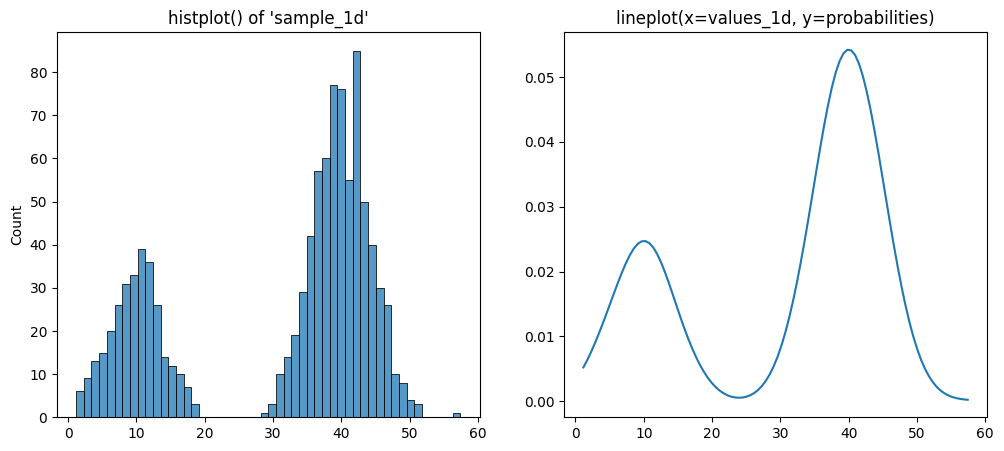

In [3]:
sample1   = np.random.normal(loc=10, scale=4, size=300)
sample2   = np.random.normal(loc=40, scale=4, size=700)
sample_1d = np.hstack((sample1, sample2))          # shape : (1000,).
sample_2d = sample_1d.reshape((sample_1d.size, 1)) # shape : (1000, 1), sample_2d is needed because ML Algo works on 2D Data.

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.histplot(x=sample_1d, bins=50, ax=axes[0]) # Just to see how the Sample Distribution looks like.
ax1.set_title("histplot() of 'sample_1d'")

model = KernelDensity(bandwidth=3, kernel='gaussian') # bandwidth = STD of each Kernel(Normal Distribution for each X axis point).
model.fit(X=sample_2d) # Now the model calculates the Probability Density (on Y Axis) for each value of sample_2d (on X Axis).

#                             sample_1d.min() == sample_2d.min(), sample_1d.max() == sample_2d.max()
values_1d = np.linspace(start=sample_1d.min(), stop=sample_1d.max(), num=100, endpoint=True) # shape : (1000,).
values_2d = values_1d.reshape((values_1d.size, 1))                                           # shape : (1000, 1).

probabilities = model.score_samples(X=values_2d)# Passed the SAMPLE 'values_2d' to compute their Probability Density (on Y Axis).
probabilities = np.exp(probabilities) # model.score_samples() returns the log-density estimate of the input samples values.
# This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate
# rather than the actual probability density estimate. np.exp() converts LOG values to its Original Values.

ax2 = sns.lineplot(x=values_1d, y=probabilities, ax=axes[1])
ax2.set_title("lineplot(x=values_1d, y=probabilities)")

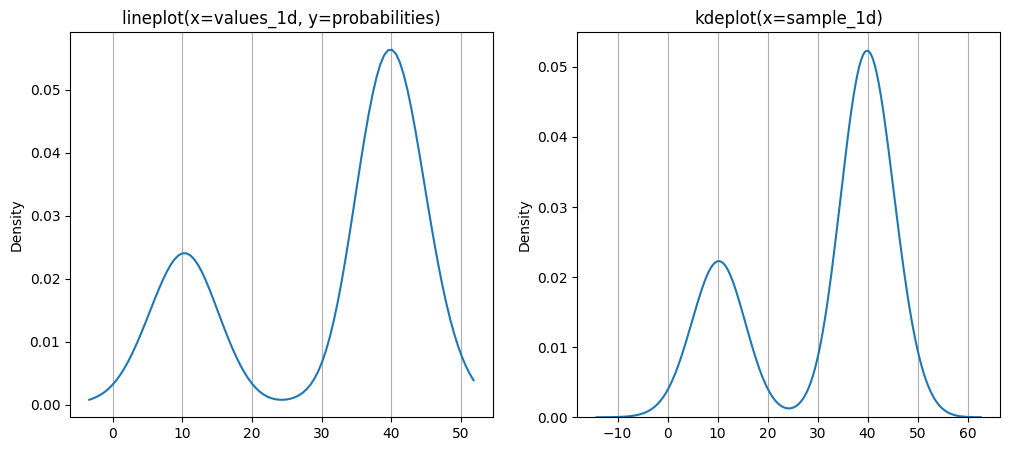

In [12]:
#                                               Run the Above Codeblock first.
#        lineplot(x=values_1d, y=probabilities) on values_id        VS        directly kdeplot(x=sample_1d) on sample dataset.
#        ----------- kdeplot drawing MANUALLY --------------        VS        kdeplot drawing using builtin function kdeplot()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.lineplot(x=values_1d, y=probabilities, ax=axes[0])
ax1.set_title("lineplot(x=values_1d, y=probabilities)")
ax1.grid(visible=True, axis='x')
ax1.set_ylabel("Density")

ax2 = sns.kdeplot(x=sample_1d, ax=axes[1])
ax2.set_title("kdeplot(x=sample_1d)")
ax2.grid(visible=True, axis='x')

explanation = """
Outwardly the LEFT plot seeming a little spacious than the RIGHT plot. But its not true because look at the X Axis on both
plot from 0 to 50, they are same! Left Plot has 100 values and Right Plot has 1000 values. That's why left plot looking
little spacious.
"""

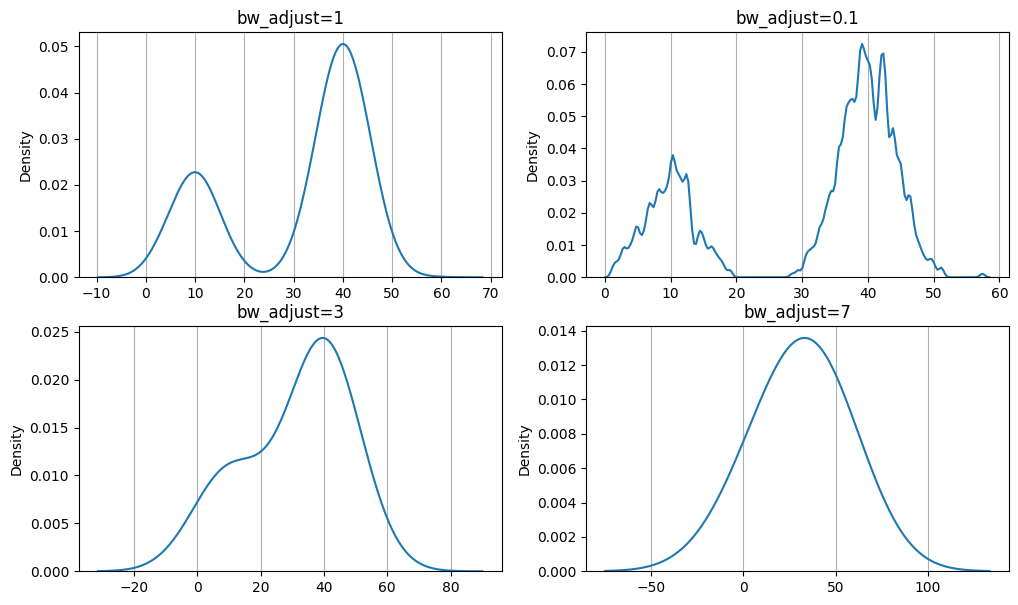

In [ ]:
#                                    Exploring bandwidth's different values through sns.kdeplot().

sample1   = np.random.normal(loc=10, scale=4, size=300)
sample2   = np.random.normal(loc=40, scale=4, size=700)
sample_1d = np.hstack((sample1, sample2))          # shape : (1000,).

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

ax1 = sns.kdeplot(x=sample_1d, bw_adjust=1,  ax=axes[0, 0]) # By Default bw_adjust=1.
ax1.set_title("bw_adjust=1")
ax1.grid(visible=True, axis='x')

ax2 = sns.kdeplot(x=sample_1d, bw_adjust=.1, ax=axes[0, 1])
ax2.set_title("bw_adjust=0.1")
ax2.grid(visible=True, axis='x')

ax3 = sns.kdeplot(x=sample_1d, bw_adjust=3,  ax=axes[1, 0])
ax3.set_title("bw_adjust=3")
ax3.grid(visible=True, axis='x')

ax4 = sns.kdeplot(x=sample_1d, bw_adjust=7,  ax=axes[1, 1])
ax4.set_title("bw_adjust=7")
ax4.grid(visible=True, axis='x')

explanation = """
        To understand what is 'bw_adjust' is, see 'kde.png' in 'images' folder. The more the bw(bandwidth), the more smooth the
        graph will be. Why? See 'bw.jpg'. So the more std/bw is, the more each kernel(normal distrubution above each point on X)
        can capture more values, so the more intersection happens for each kernal.
        
        Keep 'bw_adjust' as by default as bw_adjust = 1 = IDEAL SMOOTHNESS for each kernel to capture the values around that
        kernel and create a smooth curve.
"""

#                                               ________ Bivariate PDF
```js
            So far we have plotted kdeplot() on only 1 column e.g. sns.kdeplot(data=iris, x='petal_width'). But we can plot kde on 2 columns too.
```

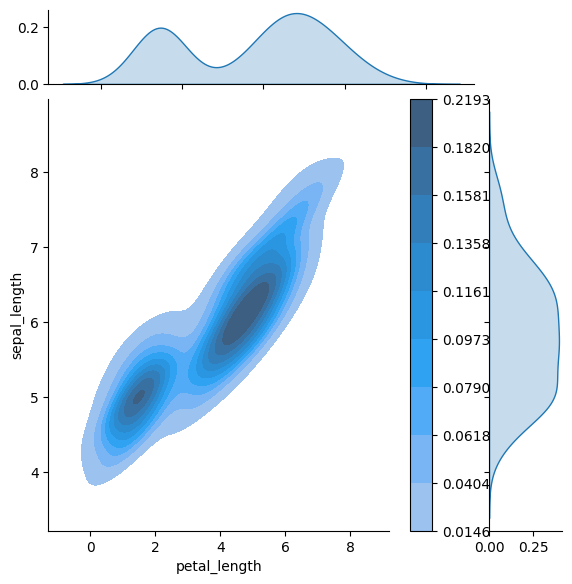

In [ ]:
iris = sns.load_dataset('iris')
""""
shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ 5.9          ┆ 3.0         ┆ 5.1          ┆ 1.8         ┆ virginica │
└──────────────┴─────────────┴──────────────┴─────────────┴───────────┘
"""
sns.jointplot(data=iris, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar=True, marginal_ticks=True)

explanation = """
1) The below kdeplot() is not just for petal_length but its a COMBINATION of (petal_length, sepal_length).

2) From the colorbar we can see THE DARKER THE COLOR, THE DENSER THE COMBINATION of (petal_length, sepal_length) in
   that X and Y axis.
                        petal_length(X Axis) : 4 to 6 and
                        sepal_length(Y Axis) : 5.5 to 6.5, has the most DENSE area.
    
    The Dense areas are nothing but the HIGHEST PART OF THE HILL like the hill we can see at the TOP KDE created for
    only petal_length.

3) The below kdeplot could be created without fill=True i.e. without any color. fill=True made it 'Contour Plot'.
   Contour Plot = A Graph that visualizes 3D data in a 2D format where the X and Y axis are actual values/columns and
                  the COLOR representing the Z axis values i.e. The Depth.
"""

#                                                     ____ PDF to CDF
```js
        1) CDF''s 'C' stands for CUMULATIVE SUM. So if we have PDF, we can estimate CDF by np.cumsum(PDF).
           To estimate PDF easily, call sns.kdeplot() and from that kdeplot() extract the X Axis Values and the PROBABILITY DENSITY for each value on the X Axis i.e. 'Y Axis Values (PDF)'.
        
        2) To calculate CDF directly there is sns.ecdfplot().
           i)  Now, when calculating PDF i.e. sns.kdeplot(), there is a 'smoothing parameter', bw_adjust, which SMOOTHS the graph and after smoothing the graph you''ll see if sample_1d.min() = -0.507, then in the sns.kdeplot() the first value on the X Axis is -11.32, not -0.507 (see the below output''s FIRST GRAPH). Why? Because we smoothed the graph by setting bw_adjust = 1(by default) inside sns.kdeplot().

           ii) But sns.ecdfplot() doesn''t have any 'smoothing parameter', means it returns CDF on the ORIGINAL values without smoothing anything and that''s why on the X Axis of ecdfplot() the first value is the exactly sample_1d.min() = -0.507 and also ecdfplot() doesn''t look cute like kdeplot(). [After reading the next step, see the below code''s 2 LOWEST GRAPHS]

           iii) Now, can we plot kdeplot() turning the 'smoothing parameter' i.e. bw_adjust OFF to see the what PDF looks like on the original values? Yes, by setting 'bw_adjust = 0.0001'. You will face error setting it to 0 because we can''t turn off this parameter entirely.
```

Xfirst = -0.507034803366329, Xlast = 51.83789381035403


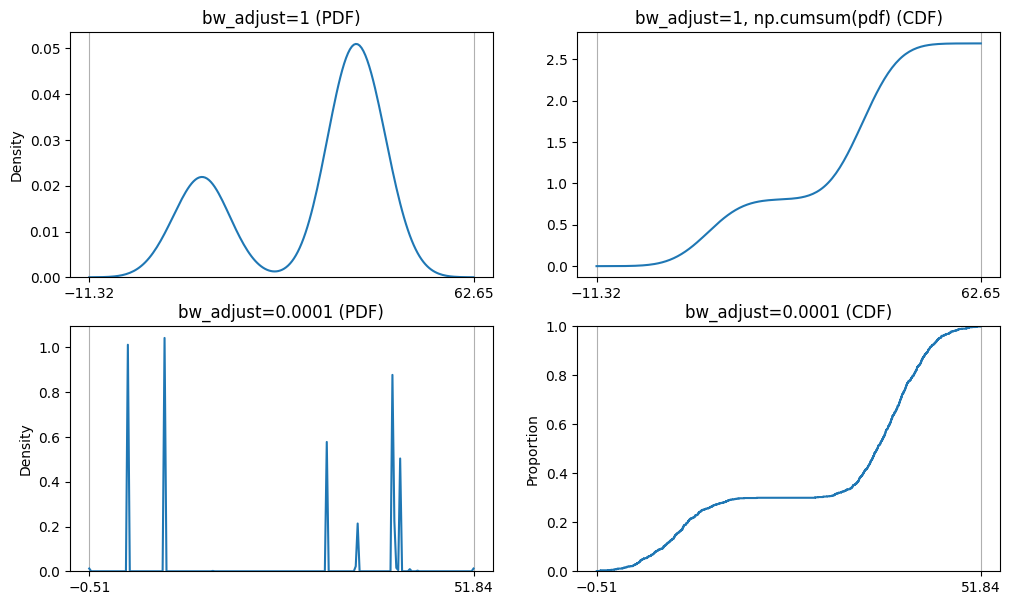

In [4]:
sample1   = np.random.normal(loc=10, scale=4, size=300)
sample2   = np.random.normal(loc=40, scale=4, size=700)
sample_1d = np.hstack((sample1, sample2))          # shape : (1000,).

print(f"Xfirst = {sample_1d.min()}, Xlast = {sample_1d.max()}")

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

ax1 = sns.kdeplot(x=sample_1d, bw_adjust=1, ax=axes[0, 0]) # By Default bw_adjust=1.
ax1.set_title("bw_adjust=1 (PDF)")
ax1.grid(visible=True, axis='x')
ax1.set_xticks(ticks=ax1.lines[0].get_xdata()[[0, -1]])
x_axis = ax1.lines[0].get_xdata()  # ax1.lines.__len()__ = 1 since there is only 1 line plotted.
pdf    = ax1.lines[0].get_ydata()

ax2 = sns.lineplot(x=x_axis, y=np.cumsum(pdf), ax=axes[0, 1])
ax2.set_title("bw_adjust=1, np.cumsum(pdf) (CDF)")
ax2.grid(visible=True, axis='x')
ax2.set_xticks(ticks=ax2.lines[0].get_xdata()[[0, -1]])

# ---------------------------------------------------------------------------------------------------------------------

ax3 = sns.kdeplot(x=sample_1d, bw_adjust=0.0001, ax=axes[1, 0])
ax3.set_title("bw_adjust=0.0001 (PDF)")
ax3.grid(visible=True, axis='x')
ax3.set_xticks(ticks=ax3.lines[0].get_xdata()[[0, -1]])

ax4 = sns.ecdfplot(x=sample_1d, ax=axes[1, 1]) #sns.lineplot(x=x_axis, y=np.cumsum(pdf), ax=axes[1])
ax4.set_title("bw_adjust=0.0001 (CDF)")
ax4.grid(visible=True, axis='x')
ax4.set_xticks(ticks=ax4.lines[0].get_xdata()[[1, -1]])

plt.show()

#                                                    ____ Use of PDF
```js
        For FEATURE SELECTIONS.
        To identify which columns are needed and which ones need to be removed to predict something from a dataset e.g. see the next codeblock.
```

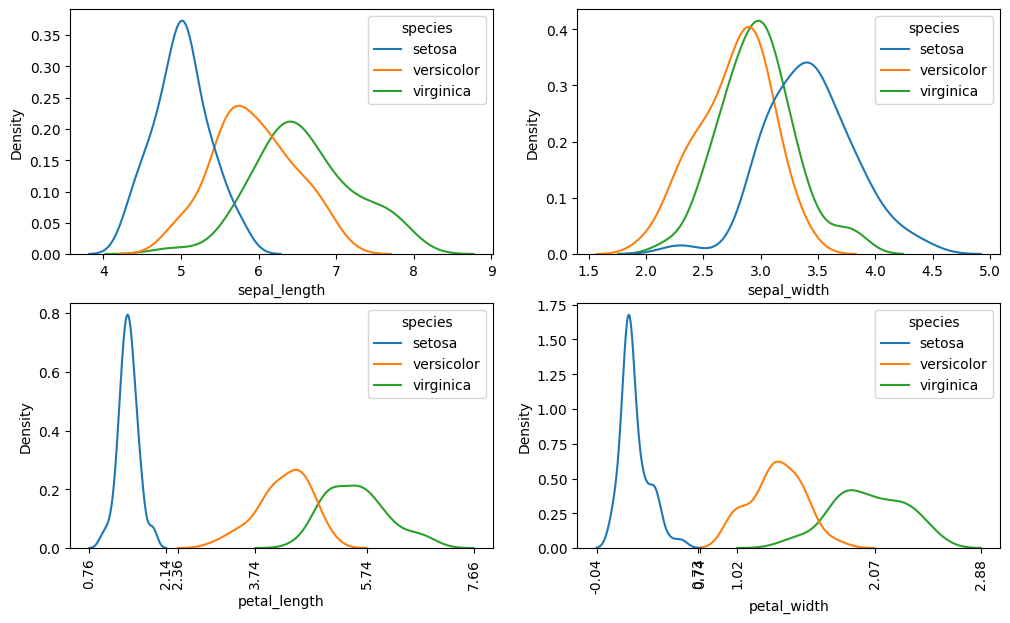

In [ ]:
iris = sns.load_dataset('iris')
""""
shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ 5.9          ┆ 3.0         ┆ 5.1          ┆ 1.8         ┆ virginica │
└──────────────┴─────────────┴──────────────┴─────────────┴───────────┘
"""
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.kdeplot(data=iris, x='sepal_length', hue='species', ax=axes[0, 0])
sns.kdeplot(data=iris, x='sepal_width',  hue='species', ax=axes[0, 1])

ax3 = sns.kdeplot(data=iris, x='petal_length', hue='species', ax=axes[1, 0]) # Below : 3 = iris['species'].nunique().
x_ticks3 = ( [ ax3.lines[line_no].get_xdata()[0]   for line_no in range(3) ] +
             [ ax3.lines[line_no].get_xdata()[-1]  for line_no in range(3) ] )
ax3.set_xticks(ticks=x_ticks3, labels=[round(v, 2) for v in x_ticks3], rotation=90)

ax4 = sns.kdeplot(data=iris, x='petal_width',  hue='species', ax=axes[1, 1])
x_ticks4 = ( [ ax4.lines[line_no].get_xdata()[0]   for line_no in range(3) ] +
             [ ax4.lines[line_no].get_xdata()[-1]  for line_no in range(3) ] )
ax4.set_xticks(ticks=x_ticks4, labels=[round(v, 2) for v in x_ticks4], rotation=90)

q_answer = """
Q   : Based on the 4 Graphs at below, which 2 graphs can identify the Flower's species more better way?

Ans : petal_length and petal_width because both of these 2 Graphs can identify 'setosa' explicitly and also can identify
      'versicolor' and 'virginica' better than the first 2 graphs e.g. in petal_length :
                                        if x >= 2.36 and x <= 3.74 :
                                            its 'versicolor' 100%
                                        if x >= 5.74:
                                            its 'virginica' 100%
    
More : So by using pdf/kdeplot we can see : 
    1) which graphs are intersecting where and which are not to see which we can identify easily.
    2) their individual Data Distribution in the dataset.
"""

#                                          ____ Use of CDF
```js
        CDF tells us what is the PROBABILITY/CHANCE/PERCENTAGE that in a range that_that will happen OR NOT.
```

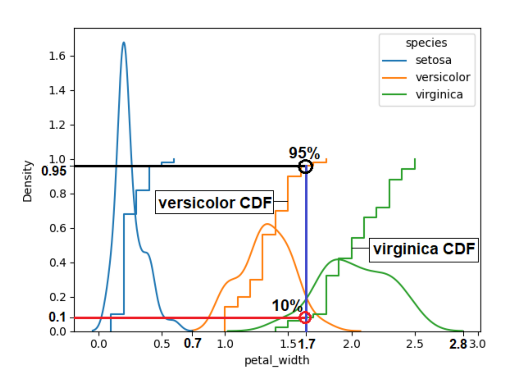

In [30]:
plt.imshow( plt.imread(r"D:\VS CODE\Data Science\math for DS\images\use_of_CDF.png"))
plt.axis('off')

use_of_cdf = """
See the output image below or if you want see more clear and bigger image you can see "use_of_cdf.png". The code that
created that image is :
                                iris = sns.load_dataset('iris')
                                sns.kdeplot(data=iris,  x='petal_width', hue='species')
                                sns.ecdfplot(data=iris, x='petal_width', hue='species')

1)
The BLUE LINE is drawn in a way that VERSICOLOR dominated from 0.7 to 1.7 and VIRGINICA from 1.7 to 2.8. So, 1.7 is the
last value till what the flower will be versicolor from 0.7 and after that its virginica. That's why the BLUE LINE is
drawn on the petal_width 1.7.

                                        if 0.7 <= petal_width < 1.7 :
                                            its versicolor.

But what is the CHANCE/PERCENTAGE that it WILL BE versicolor in 0.7 to 1.7 range? This is where the CDF helps us by
giving us the "CUMULATIVE PROBABILITY". 

Since CDF(the Y Axis Values) gives us the WHOLE/CUMULATIVE PROBABILITY UNTILL X, not just x. That's why from a point on
X axis e.g. on 1.7 we've drawn a blue line untill it reaches the CDF LINE we want to reach and then saw what is the CDF
VALUE on that INTERSECTED POINT and the CDF LIES on Y Axis.

2)
The Blue Line intersected on the VERSICOLOR CDF such that the Y Axis is 0.95. So 95% chance that the flower will be
versicolor if petal_width is less than < 1.7 and greater or equal than 0.7. Why? Because as I said CDF doesn't only tell
us the probability for 1.7 (but PDF does) but untill 1.7 from 0.7.

Why from 0.7? Because VERSICOLOR_CDF only represents the VERSICOLOR_PDF which ranges from 0.7 to 2.1.
    
    So what is the chance/percentage that the flower won't be versicolor if the petal_width is from 0.7 to 1.7?
    100 - 95 = 5%.

2)
Similarly what is the chance/percentage that the flower will be virginica if petal_width is from 0.7 to 1.7?

    The Blue Line on 1.7 intersected with VIRGNICA CDF such that the Y axis is 0.1. So, 10% chance that the flower will
    be virginica if petal_width is from 0.7 to 1.7. And 100 - 10 = 90% chance that it won't be virginica in that range.

3) For PDF/kdeplot() the Density can be more than 1 but for CDF i.e. CUMULATIVE DENSITY, its always 1.
"""

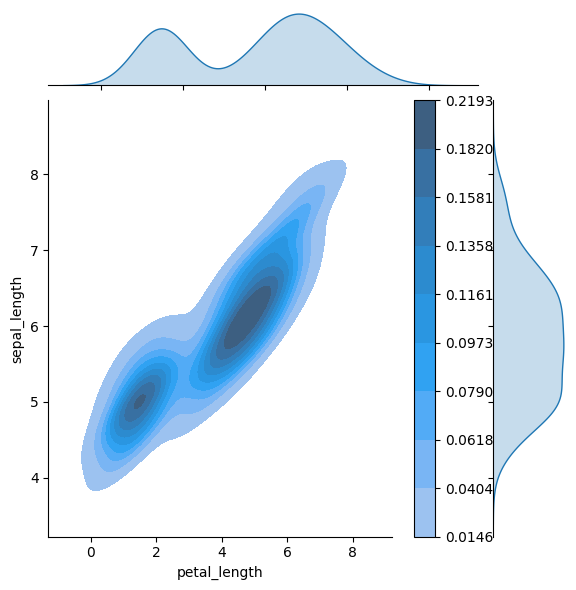

In [34]:
iris = sns.load_dataset('iris')
""""
shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ 5.9          ┆ 3.0         ┆ 5.1          ┆ 1.8         ┆ virginica │
└──────────────┴─────────────┴──────────────┴─────────────┴───────────┘
"""
sns.jointplot(data=iris, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar=True)

#                              ____ How to find if a given distribution is NORMAL or not.
```js
        1) Visually inspect a histogram or a density_plot(kdeplot()) of the data.
        
        2) QQ Plot : Compare A Pure Normal Distribution with a ASSUMED Normal Distribution by comparing their "PERCENTILES".

        3) Statistical tests : Such as the Shapiro-Wilk test, the Anderson-Darling test, and the Kolmogorov-Smirnov test.
                               These tests compare the observed data to the expected values of a normal distribution and provide a p-value that indicates whether the data is likely to be normal or not. A p-value less than the significance level (usually 0.05) suggests that the data is not normal.
```

#                                                   ________ QQ Plot

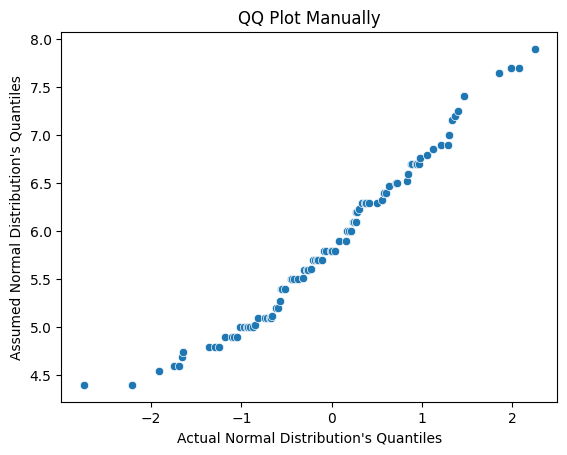

In [ ]:
#                                     QQ Plot Manually (Avoid this and use the next codeblock's function)

iris  = sns.load_dataset('iris')

sepal_length = iris['sepal_length'] # sns.kdeplot(sepal_length) looks like Normal Distribution.
percentile_of_sepal_length = [np.percentile(sepal_length, percentage) for percentage in range(1, 101)] # 4.4  to 7.9

normal_distr = np.random.normal(loc=0, scale=1, size=sepal_length.size) # Standard Normal Distribution.
percentile_of_normal_distr = [np.percentile(normal_distr, percentage) for percentage in range(1, 101)] # -2.5 to 2.1

ax = sns.scatterplot(x=percentile_of_normal_distr, y=percentile_of_sepal_length)

ax.set_title("QQ Plot Manually")
ax.set_xlabel("Actual Normal Distribution's Quantiles")
ax.set_ylabel("Assumed Normal Distribution's Quantiles")

explanation = """
    The more the data will be on the 45 Degree line, the more it is Normally Distributed.
"""

scipy.stats._distn_infrastructure.rv_continuous_frozen

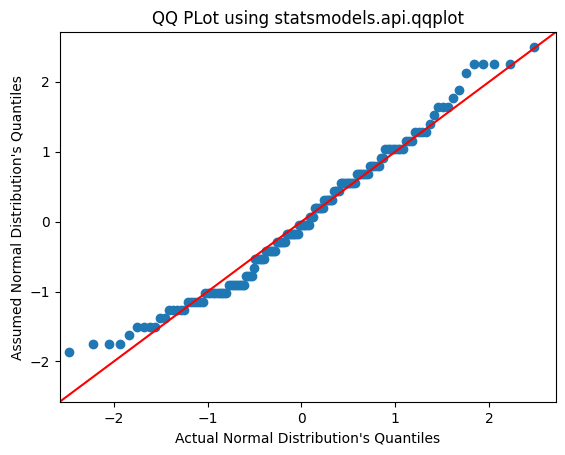

In [ ]:
#                                          QQplot using statsmodels.api.qqplot()

sm.qqplot(data=sepal_length, line="45", fit=True) # fit=True making sure the Blue Dots stays on the RED LINE.

plt.title("QQ PLot using statsmodels.api.qqplot")
plt.xlabel("Actual Normal Distribution's Quantiles")
plt.ylabel("Assumed Normal Distribution's Quantiles")

# SEE MORE DETAILS on qqplot() in the NEXT CODEBLOCK.

#                               How to find if a given distribution is ANY SPECIFIC DISTRIBUTION or not using QQ Plot

#                                                ____ QQ Plot
```js
        Parameters
        ----------
                    data = The column/data_distribution you want to check if it matches with the DATA DISTRIBUTION named in 'dist',

                    dist = 'stats.any_distribution_function_name' with whom 'data' will be compared to see if 'data' can be the     
                            DATA DISTRIBUTION named in 'dist', (by default its 'stats.norm')
                    
                    line = "45" / ....... (see the more options and details hovering over sm.qqplot()),

                    fit  = bool, false by default. fit = True means the data points will be drawn e.g. on 45 Degree line, not in
                           other place,
                    
                    ax = If given, this subplot is used to plot in instead of a new 'figure' being created,

                    Hover on qqplot() to see other parameters if you want.
```

#                                                       2. Uniform Distribution
```js
        Uniform Distribution is a Data Distribution where data is distributed UNIFORMLY/EQUALLY. There are 2 types :
                    1) PMF for Uniform Distribution (for DISCRETE   VALUES) and
                    2) PDF for Uniform Distribution (for CONTINUOUS VALUES).

        e.g. : Roll of Dice. What is the probability that it will be 5 if we roll the dice? (PMF because 1,2,3,4,5,6 are DISCRETE)
        Ans  :
                                        P(1) = 1 / 6,    (Number of outcomes / number of unique values)
                            Similarly,  P(2) = 1 / 6,
                                        P(3) = 1 / 6,
                                        P(4) = 1 / 6,
                                        P(5) = 1 / 6,
                                        P(6) = 1 / 6.
                
                If we draw the PMF it will look like "uniform.png" under 'images' folder. As you can see, on the Y Axis values/probability are same.
        
        'WARNING' :
        -----------
                PMF Uniform Distribution : The histogram may look like "each bin represents ONE NUMBER e.g. for above roll of dice" or "each bin has a range e.g. [1 - 5]".
                PDF Uniform Distribution : The histogram will look like "each bin has a range e.g. [1 - 5]". Se the below output's histogram.
```

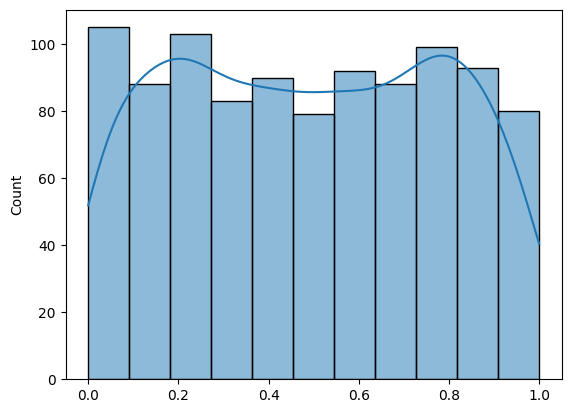

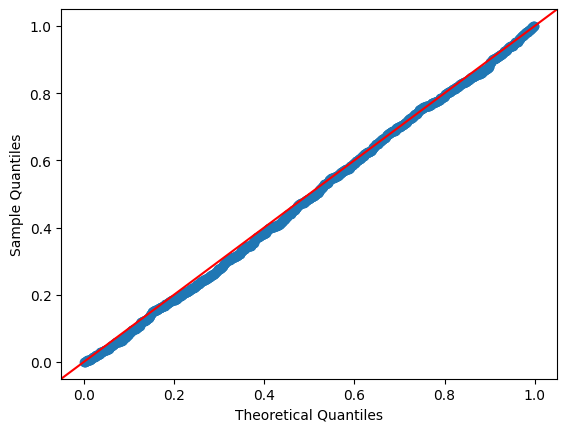

In [ ]:
#                             Checking if 'sample'(uniform_distr) matches with Uniform Distribution using qqplot.

uniform_distr = np.random.uniform(low=0, high=1, size=(1000,)) # SAMPLE data of 1000 values whose low and high are very close to
              # POPULATION's low(0) and high(1). Since it is 'sample', it won't look exactly Uniform Distribution but resembles.

a = np.linspace(start=uniform_distr.min(), stop=uniform_distr.max(), endpoint=True, num=100)

sns.histplot(x=uniform_distr, kde=True) # Just to see how UNIFOM DISTRIBUTION looks like in "uniform_distr" using hist+kde plot.
sm.qqplot(data=uniform_distr, dist=stats.uniform, line="45", fit=True)

plt.show()

#                                                   3. Log Normal Distribution
```js
        A Lognormal Distribution is a 'heavy tailed'(right skewed) continuous probability distribution of a random variable whose 'logarithm is normally distributed'. So, it is "very similar to Normal Distribution".

        1) It is RIGHT SKEWED, but not just any Right Skewed, that Right Skewed whose logarithm values(the X Axis values obviously) creates A Normal Distribution.
                        'So the same values that creates this Log Normal Distribution, are the same values whose logarithms creates a NORMAL DISTRIBUTION.'

        2) The more the STD, the more FAT the TAIL is with SHORT height. See 'log_normal.png'.

        Example : The LENGTH of comments under a youtube video, where a few people''s comments are LARGE. but most people''s comments are little.
                  So anything what only few people do and most people don''t is an Example of Log Normal Distribution.
```

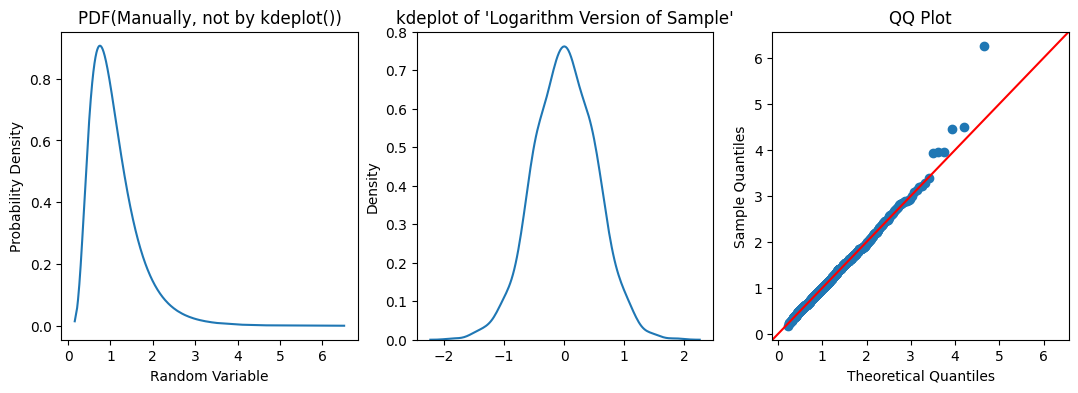

In [62]:
log_normal = np.random.lognormal(mean=0, sigma=0.5, size=(1000,)) # returns a 'sample' of 1000 values whose mean and sigma are very
#  close to POPULATION's mean(0) and sigma(0.5). Since it is 'sample', it won't look exactly Log Normal Distribution but resembles.

log_normal_params = stats.lognorm.fit(log_normal) # returns loc(mean) and scale(std/sigma).
log_normal_obj = stats.lognorm(log_normal_params[0], log_normal_params[1]) # loc=..[0], scale=..[1] didn't work. Either way we
                                                                # will need just ..[0], ..[1]. So, don't need to use parameters.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

ax1 = sns.lineplot(x=log_normal, y=log_normal_obj.pdf(log_normal), ax=axes[0])
ax1.set_xlabel("Random Variable")
ax1.set_ylabel("Probability Density")
ax1.set_title("PDF(Manually, not by kdeplot())")

ax2 = sns.kdeplot(x=np.log(log_normal), ax=axes[1])
ax2.set_title("kdeplot of 'Logarithm Version of Sample'")

fig = sm.qqplot(data=log_normal, dist=stats.lognorm, line="45", fit=True, ax=axes[2])
axes[2].set_title("QQ Plot") # but fig.set_title("QQ Plot") doesn't work.

plt.show()

#                                             4 & 5. Bernoulii and Binomial Distribution
```js
        When the outcome is Yes(1) or No(0), it is Bernoulii Distribution. Since the outcome is DISCRETE (1 OR 0), so it has PMF only.

        Example :  The Bernoulli distribution is commonly used in machine learning for modelling binary outcomes, such as whether a customer will make a purchase or not, whether an email is spam or not, or whether a patient will have a certain disease or not.

        'PMF' = P(X=x) = P^x * (1-P)^(1-x), where P = is the probability.

              e.g.
                1) For a coin lets consider the Head is 1 and the Tail is 0. What is the probability that after tossing the coin it will be Head(1)?
                   Ans : P(Head) = 1/2 = 0.5 and PMF = P(X=1) = 0.5^1 * (1-0.5)^(1-1) = 0.5
                   Similarly for Tail(0) : P(Tail) = 1/2 = 0.5 and PMF = P(X=0) = 0.5^0 * (1-0.5)^(1-0) = 0.5
                
                2) For a dice lets consider Getting 5 is 1 and not getting 5 is 0. What is the probability that after rolling the dice it will be 5(1)?
                   Ans : P(5) = 1/6 = 0.17 and PMF = P(X=1) = 0.17^1 * (1-0.17)^(1-1) = 0.17
                   Similarly for not 5(0) : P(not 5) = 1 - 1/6 = 0.84 and PMF = P(X=0) = 0.84^0 * (1-0.84)^(1-0) = 0.16

        'WARNING' : For the coin example, we flipped the coin only ONCE! In Bernoulii Distribution we do it ONCE and find the   
                    probability of SUCCESS(1 since we can be succeed only 1 time) OR FAILURE(0). So the PMF will have 2 values on X axis which is 0 and 1.
                    But in Binomial Distribution we do it N times(N=1, 2, 3.....) e.g. the probability that head will appear 2_times(success = 2) out of 3 tosses of a coin, where n = 3 and x = 2, the probably

                                    Bernoulii_PMF = P^x * (1-P)^(1-x),       x = 0 or 1
                                    Binomial_PMF  = nCx * P^x * (1-P)^(1-x), x = 1, 2, 3 ... (Hyperparameters = P, x)
                    
                    Binomial Distribution : So we can toss a coin n times and check how many time head/tail will appear. Lets say we tossed a coin 10 times and how many P = 0.5 i.e. the 
```

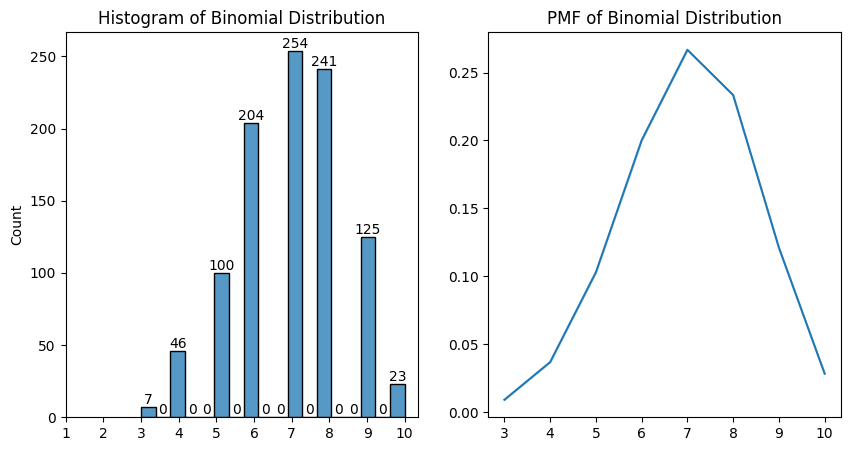

In [34]:
"""
Binomial Distribution
---------------------
So we can toss a coin n times and check how many time head/tail will appear. Lets say we tossed a coin 10 times and want to see
how many times the head appeared where the Probability Success, P = 0.5 i.e.
            10 times * 0.5 = 5. So the success rate of the number of Head out of 10 tosses is "around" 5 times. Why "around"?
                        P = Probability Success Rate i.e. it denotes the POSSIBIILITY/PROBABILITY, not "IT WILL BE EXACTLY 5".
            So MOST PROBABILY the number of head will be 4, 5, 6 (around 5). Sometimes it can be 8, 2 also but LESS TIME.

So for 1000 times and each time lets toss the coin for 10 times to see how many head appears with the probability success,
p = 0.7 (that means the number of head will be around 10 * 0.7 = 7 MOST OF THE TIME which will be 6/7/8)
"""

# n = number of toss/trial each time will take place, p = Probabilty Success.
binomial_distr = np.random.binomial(n=10, p=0.7, size=1000) # returns integers.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# To see if really around 7 (6/7/8) has the most count or not.
ax1 = sns.histplot(x=binomial_distr, ax=axes[0]) # The Histplot shifted towards RIGHT SIDE since 6/7/8 is after the Middle Value 5.
ax1.set_xticks(ticks=np.arange(1, 10+1))
ax1.bar_label(container=ax1.containers[0])
ax1.set_title("Histogram of Binomial Distribution")
# if p = 0.3, then the histplot would shift towards LEFT SIDE since 10 * 0.3 = around 3 is at the LEFT of the Middle Value 5.

binomial_obj = stats.binom(n=10, p=0.7)
ax2 = sns.lineplot(x=binomial_distr, y=binomial_obj.pmf(binomial_distr), ax=axes[1]) # binomial_obj doesn't have pdf().
ax2.set_title("PMF of Binomial Distribution")

plt.show()
warning = """
We can't do  sm.qqplot(data=binomial_distr, dist=stats.binom, line="45", fit=True)  because it has PMF, not PDF. Every PDF has
mean and SPECIALLY SCALE which PMF doesn't contain. Hence stats.binom doesn't have "fit" function since PMF doesn't have mean &
SCALE.
"""

#                                               Central Limit Theorem
```js
        Sample Distribution :
        ---------------------
            To know the Mean Salary of a whole country, we need to go to each people which is impossible/tiresome and assume the population is 1 crore. Rather we can e.g. collect the salary of RANDOM 50 people ('sample size = 50') from one big area where there are e.g. 10 thousands people, then we repeat the same process for every other big area and assume we have 20 big areas.
            So collecting salary of 50 random people from all 20 big areas = 50 * 20 = 1000. So now we have the salary of 1000 people from all the areas of the whole country and we can use it to infer any statistical property(mean, std, variance etc). This is called 'Sample Distribution'.
            - And sample distribution is 2D Array since at above, each time we are collecting an array of sample_size(50) people for 10 thousands time.
        
        Central Limit Theorem :
        -----------------------
            1) If we calculate the MEAN of each SAMPLE_ARRAY_VALUE inside Sample Distribution, we will have an 1D Array of Sample Means and all those means are NORMALLY DISTRIBUTED. "So NEW_SAMPLE = This 1D Array of Means. Sample Distribution are collection of samples, not the final SAMPLE." Because lets say I want to know the population''s mean. So if I know the mean of each of the big area, then collecting all those variety means I can calculate the approximate population mean? So our main goal is to have that 1D Array of all sample''s mean.

            2) Population''s (Mean, Variance) == Sample''s (Mean, Variance/n) where n = 'sample size'.
                i) So we can directly say that Population''s mean == Sample''s mean. But statisticians don''t do that because its not exactly same e.g. Population mean = 32.20 and Sample mean = 32.09, so they say Okay the mean is in that range/interval which is between '2 Standard Deviations' i.e. according to Empirical rule 95.45% sure that my mean in the range of 2 Standard Deviations.

                ii) But why not between 3 Standard Deviations which is 99.73% sure? 2 Standard Deviations tells us the mean in e.g. 10-15 range but 3 Standard Deviations tells us the mean in e.g. 7-20 range. We want to hear the mean in 10-15 range obviously.
            
            The conditions required for the CLT :
            -------------------------------------
                1) The sample is drawn from a finite population or an infinite population with a finite variance.
                2) "sample size >= 30".
                3) The random variables in the sample are independent and identically distributed.
            
            Warning : "So if sample size >= 30, it will follow CENTRAL LIMIT THEOREM and if it follows CENTRAL LIMIT THEOREM, that means we will get Normal Distrubition!". So, "It will be Normal Distribution if sample size >= 30".
```

The sample mean = 32.474 and Population mean = 32.204.
The interval where we are 95.45% sure that mean lies, is between 30.505 and 34.443.


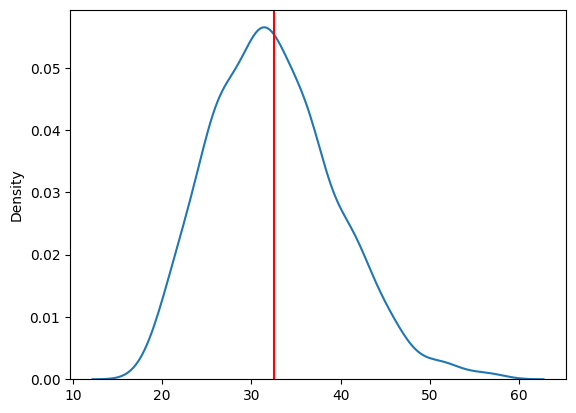

In [ ]:
fare = pl.read_csv(r"d:\Datasets\CampusX\titanic.csv", columns=["Fare"]).to_series() # Assume it is Population.
sample_size = 50

sample_distibution = np.array([fare.sample(sample_size) for _ in range(1000)]) # shape = (1000, 50).

sample_distribution_means = sample_distibution.mean(axis=1) # "SAMPLE".
# sample_distibution_means give us the values that are normally distributed i.e. "normal_distribution_values" / "sample".
# And if I want to know the std/var or anything else, I would calculate that from "normal_distribution_values" because it
# is my "sample". sample_distibution is not "sample" but collection of samples whose mean(axis=1) returns "sample".

# To calculate the interval where SAMPLE MEAN lies 95.45%, we need to calculate 2 Standard Deviations, (mean - 2*std) and
# (mean + 2*std) and for that we need to know mean i.e. sample_mean and std i.e. sample_std.
sample_mean = sample_distribution_means.mean()
sample_std  = np.sqrt(sample_distribution_means.var() / sample_size) # std = np.sqrt(var)

lower_limit = sample_mean - 2*sample_std
upper_limit = sample_mean + 2*sample_std

print(f"""The sample mean = {sample_mean:.3f} and Population mean = {fare.mean():.3f}.
The interval where we are 95.45% sure that mean lies, is between {lower_limit:.3f} and {upper_limit:.3f}.""")

ax = sns.kdeplot(sample_distribution_means) # Returns normal distribution shape, not 100%.
ax.axvline(x=sample_mean, color='red')
plt.show()

#                                                   Confidence Interval
```js
        At above in Central Limit Theorem Section, we inferred Population Mean from the Sample_Distribution. There(the output) we saw that our Sample Mean != Population mean which is "The sample mean = 32.474 and Population mean = 32.204.". That''s why statistician used INTERVAL to tell that "The interval where we are 95.45% sure that mean lies, is between 30.505 and 34.443." But Central Limit Theorem can be used if "sample size >= 30". What if sample size < 30? That''s where Confidence Interval (Population''s STD is not known which is very practical because we won''t go every people to collect the information but rather we will use SAMPLE to infer any approximate information of Population) helps us.

        In Central Limit Theorem we calculated the interval within 2 Standard Deviation which was 95.45%, its FIXED. But in Confidence Interval, its not fixed. It can be anything from 0 to 100 and its called "CONFIDENCE LEVEL". The best Confidence Level is 95%.

        Our main target is to calculate the INTERVAL. The Equation for Confidence Interval :
                                CI = Mean ± t*(std / √n),       t depends on the "sample size (n)" and "confidence level" (See 
                                                                "t_table.png" under images folder).
```

In [ ]:
fare = pl.read_csv(r"d:\Datasets\CampusX\titanic.csv", columns=["Fare"]).to_series() # Assume it is Population.
sample_size = 30

sample_distibution = np.array([fare.sample(sample_size) for _ in range(1000)]) # shape = (1000, 50).
# sample_distibution = [ [sample1], [sample2], [sample3].... ] i.e. collection/arrays of sample.

sample_distribution_means = sample_distibution.mean(axis=1) # ... = [ sample1.mean(), sample2.mean(), ... ]
sample_distibution_stds   = sample_distibution.std(axis=1)  # ... = [ sample1.std(),  sample2.std(), ... ]

sample_mean = sample_distribution_means.mean() # the Average of all the Sample Mean inside sample_distribution_means.
sample_std  = sample_distibution_stds.mean() # the Average of all the Sample STD inside sample_distribution_means.
# We can't take all the Sample Mean inside sample_distribution_means but their average/mean.
# We can't take all the Sample STD  inside sample_distribution_std   but their average/mean.

lower_limit = sample_mean - 2.042*(sample_std / np.sqrt(sample_size))
upper_limit = sample_mean + 2.042*(sample_std / np.sqrt(sample_size))

print(f"""The interval where we are 95% sure that mean lies, is between {lower_limit:.3f} and {upper_limit:.3f}.
The Actual answer(mean) is {fare.mean():.3f} which lies above interval.""")
# Luckily we assumed fare is POPULATION, that's why we could also estimated the actual mean but irl we will only be able
# to calculate the interval with a confidence level.

The interval where we are 95% sure that mean lies, is between 16.198 and 48.559.
The Actual answer(mean) is 32.204 which lies above interval.


#                                           Hypothesis Testing using T Test
```js
    There are actually 2 types of Test, P and T test. P test is used when you have given POPULATION DATA and T test when you have SAMPLE DATA. In real world scenerio, we''ll work with the sample data. So I am only writing for T test.

    Hypothesis Testing is, testing my hypothesis if its true or false. E.G. my company''s current annual income is 2k. Will it increase next this year? In this case :
                Null Hypothesis,        H0 = It will remain same.    ('Null' as in No Change)
                ALternative Hypothesis, H1 = It will increase.
    
                 x̄ - μ     |  x̄ = mean of sample.
        T test = -----     |  s = std  of sample.
                  s√n      |  n = size of sample.
                           |  μ = mean of population.
        
        So we need 'sample' data (to calculate mean, std, size) and Population Mean (not Population data) to calculate T Test.

        Requirements to apply T Test on A 'Single Column' :
        ---------------------------------------------------
            1) Dataset need to be Normal Distribution and size of Dataset need to be > 30. If its less than 30, use e.g. shapiro-wilk test to STRICTLY CHECK IF THE DATA IS NORMAL.
```

```js
        Below we will practice T Test. Lets assume :
        
            H0 : The 'population' mean age is 35.
            H1 : The 'population' mean age is < 35.
        
        Even though below, we have 'population'(population_age), we will assume it doesn''t exist and population_age_mean and sample_age are given in the question. We will use T Test using sample_age.
```

In [83]:
population_age = pl.read_csv(r"D:\VS CODE\Data Science\math for DS\Dataset\titanic.csv", columns='Age').to_series() .drop_nulls()

population_age_mean = population_age.mean()
sample_age = population_age.sample(25)

# 1) Since sample size is < 30. Check strictly if its Normal using shapiro-wilk. shapiro-wilk returns something like
# ShapiroResult(statistic=0.9569826022018579, pvalue=0.35766161321096357). If pvalue < 0.05, its not Normal.

shapiro_age = stats.shapiro(x = sample_age) # shapiro_age[1] = 0.3957 i.e. pvalue > 0.05. sample_age Normal.

# 2) Calculate t_test/t_statistic and p_value using stats.ttest_1samp().
t_statistic, p_value = stats.ttest_1samp(a = sample_age, popmean = population_age_mean)

print("t_statistic =", t_statistic)
print("p_value     =", p_value / 2) # if H1 says '<' or '>'. Then p_value = p_value / 2. If its '!=', then no need to / 2.

# 3) Check if the Null Hypothesis can be rejected or not comparing the p_value with alpha.
alpha = 0.05

if p_value < alpha :
    print("\nReject the Null Hypotheis, which means 'The mean age is < 35'.")
else :
    print("\nFail to reject the Null Hypothesis, which means 'The mean age is 35'.")

print("\nThe actual mean age is.", population_age_mean)

warning = """
        As you can see, whenever pvalue < 0.05 its NOT normal_distribution / Reject_the_Null_Hypotheis.
"""

t_statistic = 0.48294132923924693
p_value     = 0.3167568157451208

Fail to reject the Null Hypothesis, which means 'The mean age is 35'.

The actual mean age is. 29.69911764705882


```js
        Requirements to apply T Test on 'Multiple Column which are INDEPENDENT i.e. they are COMPLETELY DIFFERENT COLUMN' :
        -------------------------------------------------------------------------------------------------------------------
            1) Dataset need to be Normal Distributed and size of Dataset need to be > 30. If its less than 30, use e.g. shapiro-wilk test to STRICTLY CHECK IF THE DATA IS NORMAL.
            
            2) The variances of the two columns i.e. 'populations' should be 'approximately equal'. This assumption can be checked using F-test('levene test') for equality of variances.
                NOTE : If this assumption is not met, you can use "Welch's t-test which does not require equal variances". Below practice example''s dataset is made in a way that it pass the levene test.
```

```js
        Q : Apply T Test on the below hypothesis.

            H0 => Mean age of both male and female are similar.
            H1 => Mean age of male is higher than female.
```

In [82]:
titanic = pd.read_csv(r"D:\VS CODE\Data Science\math for DS\Dataset\titanic.csv")

population_male   = titanic.loc[titanic['Sex'] == 'male',   'Age'] .dropna() # (453,)
population_female = titanic.loc[titanic['Sex'] == 'female', 'Age'] .dropna() # (261,)

sample_male   = population_male.sample(25)
sample_female = population_female.sample(25)

# 1) Since sample size is < 30. Check strictly if its Normal using shapiro-wilk. shapiro-wilk returns something like
# ShapiroResult(statistic=0.9569826022018579, pvalue=0.35766161321096357). If pvalue < 0.05, its not Normal.
shapiro_male   = stats.shapiro(x=sample_male) # shapiro_male[1] i.e. pvalue = 0.042 > 0.05 i.e. sample_male NORMAL.
shapiro_female = stats.shapiro(x=sample_female) # shapiro_female[1] i.e. pvalue = 0.632 > 0.05 i.e. sample_female NORMAL.

# 2) Check if their variance is really 'approximately equal' using levene test. It returns something like
# LeveneResult(statistic=0.5193464701661421, pvalue=0.47461581991597956). If pvalue < 0.05, both of their column's
# variance are not 'approximately equal'.
levene_test = stats.levene(sample_male, sample_female) # pvalue=0.47, means both sample's variance are almost equal.

# 3) Calculate t_test/t_statistic and p_value using stats.ttest_1samp().
t_statistic, p_value = stats.ttest_ind(a=sample_male, b=sample_female)

print("t_statistic =", t_statistic)
print("p_value     =", p_value / 2) # if H1 says '<' or '>'. Then p_value = p_value / 2. If its '!=', then no need to / 2.

# 3) Check if the Null Hypothesis can be rejected or not comparing the p_value with alpha.
alpha = 0.05

if p_value < alpha :
    print("\nReject the Null Hypotheis, which means 'Mean age of male is higher than female'.")
else :
    print("\nFail to reject the Null Hypothesis, which means 'Mean age of both male and female are similar'.")

print("\nThe actual MALE   mean age is", population_male.mean())
print("The actual FEMALE mean age is", population_female.mean())

warning = """
        As you can see, whenever pvalue < 0.05 its NOT normal_distribution / Reject_the_Null_Hypotheis.
"""

t_statistic = 2.3750648251199302
p_value     = 0.010794550933214226

Reject the Null Hypotheis, which means 'Mean age of male is higher than female'.

The actual MALE   mean age is 30.72664459161148
The actual FEMALE mean age is 27.915708812260537


```js
        Requirements to apply T Test on 'Multiple Columns that are related by belonging the same row to one individual' :
        -----------------------------------------------------------------------------------------------------------------
        Example : My marks in both mid and final term belongs to me but they are in 2 different columns.
                  Assume before = [...], after = [...], difference = after - before

            1) 'difference' need to be Normal Distributed and size of difference need to be > 30. If its less than 30, use e.g. shapiro-wilk test to STRICTLY CHECK IF THE DATA IS NORMAL.
            
            2) Each pair(same row) of before and after must be independant i.e. one pair should not depend on another pair. In other word one pair should be different than other pairs (if possible).
            
```

```js
        Q : Apply T Test on the below hypothesis.

            H0 => Mean/Average weight of before == Mean/Average weight of after.
            H1 => Mean/Average weight of before >  Mean/Average weight of after.
```

In [88]:
before_weight = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after_weight  = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

difference = after_weight - before_weight

# 1) Since size of 'difference'(15) < 30. Check strictly if its Normal using shapiro-wilk. shapiro-wilk returns something
# like ShapiroResult(statistic=0.9220571486009436, pvalue=0.20704778986900568). If pvalue < 0.05, its not Normal.
shapiro_difference = stats.shapiro(x = difference) # pvalue > 0.05 i.e. 'difference' follows NORMAL DISTRIBUTION.

# 2) Calculate t_test/t_statistic and p_value using stats.ttest_1samp().
t_statistic, p_value = stats.ttest_rel(a=before_weight, b=after_weight)

print("t_statistic =", t_statistic)
print("p_value     =", p_value / 2) # if H1 says '<' or '>'. Then p_value = p_value / 2. If its '!=', then no need to / 2.

# 3) Check if the Null Hypothesis can be rejected or not comparing the p_value with alpha.
alpha = 0.05

if p_value < alpha :
    print("\nReject the Null Hypotheis, which means 'Mean/Average weight of before > Mean/Average weight of after'.")
else :
    print("\nFail to reject the Null Hypothesis, which means 'Mean/Average weight of before == Mean/Average weight of after'.")

print("\nMean/Average weight of before =", before_weight.mean().round(2))
print("Mean/Average weight of after  =", after_weight.mean().round(2))

warning = """
        As you can see, whenever pvalue < 0.05 its NOT normal_distribution / Reject_the_Null_Hypotheis.
"""

t_statistic = -0.10482848367219182
p_value     = 0.45899948531425433

Fail to reject the Null Hypothesis, which means 'Mean/Average weight of before == Mean/Average weight of after'.

Mean/Average weight of before = 80.6
Mean/Average weight of after  = 80.67


#                                       Convert any distribution to Normal Distribution.
```js
        There are 2 types converter/transformer for transforming any data distribution into NORMAL DATA DISTRIBUTION :

        1) Function Transformer : ( It lets you apply any specific transformation or functionn to your data )
        -------------------------   -----------------------------------------------------------------------
            1) Log Transformation : log(x). If data is RIGHT SKEWED, we apply log on the values. log works only on the values > 0.
            2) Square Root Transformation : X^2. When the data is Left Skewed.
            3) Reciprocal Transformation : 1/X. When the bigger values need to be smaller (1/10 = 0.1) and smaller values need to be bigger (1/0.1 = 10).
            4) Custom Transformation : We can put sin(x), cos(x), x^3 i.e. any transoformation we want.
        
        2) Power Transformer : ( Its a Specialized Transformer to transform any data to NORMAL DISTRIBUTION )
        ----------------------   --------------------------------------------------------------------------
            1) Box-Cox Transformation: This only works for positive values. (kaggle)
            2) Yeo-Johnson Transformation: This works for data that has both positive and negative i.e. for ANY VALUES. (kaggle)

            By default powertransformer() applies Yeo-Johnson Transformation since it works on any data. Powertransformer() is best to convert any DATA DISTRIBUTION into NORMAL DISTRIBUTION.
        
        3) Quantile Transformer : (Doesn''t get used much, so skipping it)
```

#                                            ____ Function Transformer

Text(0.5, 1.0, 'After Log Transformation : Normal Distribution.')

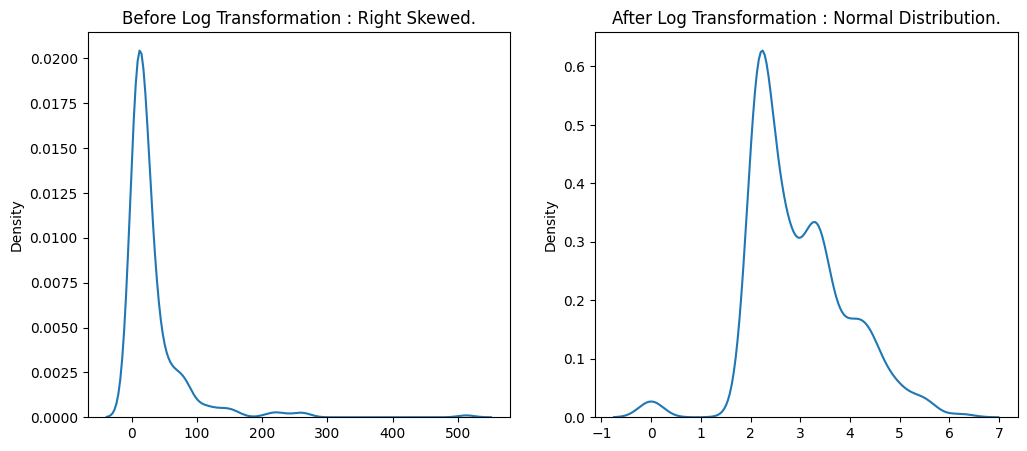

In [59]:
fare = pl.read_csv(r"d:\Datasets\CampusX\titanic.csv", columns=["Fare"]).to_series() # Right Skewed Data.

# np.log1p() add 1 with the data, then perform log() because if the data has 0, then log(0) returns undefined.
log_transformer = FunctionTransformer(func=np.log1p) # For custom function e.g. func=lambda x:1/x .
fare_log = log_transformer.transform(fare)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1 = sns.kdeplot(fare, ax=axes[0])
ax1.set_title("Before Log Transformation : Right Skewed.")
ax2 = sns.kdeplot(fare_log, ax=axes[1])
ax2.set_title("After Log Transformation : Normal Distribution.")

#                                            ____ Power Transformer
```js
        Both Box-Cox and Yeo-Johnson Transformation has a parameter to calculate, lambda. See "power_transformer.png" for Yeo-Johnson equation. So we can apply this equation only when we know the lambda value for each value of data.

            >>> power_transformer = PowerTransformer() // method="yeo-johnson"  by default.
            >>> power_transformer.transform() only applies the equation, it doesn''t calculate the λ for each value before calculation. So we need to calculate the λs first.
            >>> power_transformer.fit() calculates the λ parameter for each value. Then usingg those λs we can apply power_transformer.transform(). Luckily we have power_transformer.fit_transform() which calculates λs and then use those λs to apply the equation on the whole data.
        
        'Warning' : PowerTransformer().fit_transform() requires 2D DATA like 'Dataframe' or '2D Numpy Array'.
```

Text(0.5, 1.0, 'After Yeo-Johnson Transformation: Normal Distribution.')

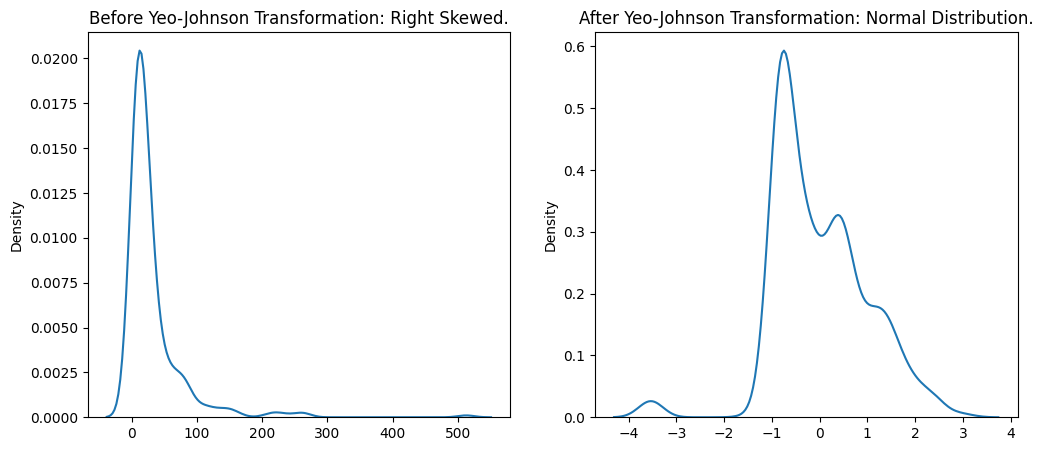

In [58]:
fare = pl.read_csv(r"d:\Datasets\CampusX\titanic.csv", columns=["Fare"]) # (891, 1) DataFrame and Right Skewed Data.

power_transformer = PowerTransformer() # method="yeo-johnson"  by default.
fare_normal = power_transformer.fit_transform(X=fare)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1 = sns.kdeplot(fare, ax=axes[0], legend=False)
ax1.set_title("Before Yeo-Johnson Transformation: Right Skewed.")
ax2 = sns.kdeplot(fare_normal, ax=axes[1], legend=False)
ax2.set_title("After Yeo-Johnson Transformation: Normal Distribution.")